# AI4Code Pytorch DistilBert Baseline

I used a lot of code from Kaggle's starter notebook here: https://www.kaggle.com/code/ryanholbrook/getting-started-with-ai4code
and here: https://www.kaggle.com/code/aerdem4/ai4code-pytorch-distilbert-baseline

I replaced their model with a DistilBert model.

In [1]:
import json
from pathlib import Path

import numpy as np
import pandas as pd
from scipy import sparse
from tqdm import tqdm

pd.options.display.width = 180
pd.options.display.max_colwidth = 120

BERT_PATH = "../input/huggingface-bert-variants/distilbert-base-uncased/distilbert-base-uncased"

data_dir = Path('../input/AI4Code')

In [2]:
NUM_TRAIN = 200


def read_notebook(path):
    return (
        pd.read_json(
            path,
            dtype={'cell_type': 'category', 'source': 'str'})
        .assign(id=path.stem)
        .rename_axis('cell_id')
    )


paths_train = list((data_dir / 'train').glob('*.json'))[:NUM_TRAIN]
notebooks_train = [
    read_notebook(path) for path in tqdm(paths_train, desc='Train NBs')
]
df = (
    pd.concat(notebooks_train)
    .set_index('id', append=True)
    .swaplevel()
    .sort_index(level='id', sort_remaining=False)
)

df

Train NBs: 100%|██████████| 200/200 [00:01<00:00, 145.28it/s]


cell_type                                                                                                                   source
id             cell_id                                                                                                                                    
00644e80ec8e70 2d19bafd      code  # This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/pyt...
               804ac9dd      code  import numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nsns.set_style('whit...
               e3290b2e      code                                                              df = pd.read_csv('../input/montcoalert/911.csv')\ndf.head()
               40a2cdc4      code                                                                                                                df.info()
               28c27206      code                                                                                          df['zip'].value_counts().head()
...                           ...                                                                                                                      ...
fd3bbdf3840149 3727a048  markdown                                                             There is 1 csv file in the current version of the dataset:\n
               f1400526  markdown                                                                     Let's take a quick look at what the data looks like:
               916b863e  markdown  ## Introduction\r\nGreetings from the Kaggle bot! This is an automatically-generated kernel with starter code demons...
               eb475d5d  markdown  ## Conclusion\r\nThis concludes your starter analysis! To go forward from here, click the blue "Edit Notebook" butto...
               4bebc8b8  markdown  ## Exploratory Analysis\r\nTo begin this exploratory analysis, first use `matplotlib` to import libraries and define...

[8735 rows x 2 columns]

In [3]:
# Get an example notebook
nb_id = df.index.unique('id')[6]
print('Notebook:', nb_id)

print("The disordered notebook:")
nb = df.loc[nb_id, :]
display(nb)
print()

Notebook: 051d049a469e47
The disordered notebook:


,cell_type,source
cell_id,,
d7e4aeec,code,!pip install pyspark
aeb2a838,code,from pyspark.sql import SparkSession\nspark = SparkSession.builder.appName('classification').getOrCreate()
12c1a908,code,"from itertools import chain\nfrom pyspark.sql.functions import count, mean, when, lit, create_map, regexp_extract"
e7e68995,code,"df1 = spark.read.csv('../input/titanic/train.csv',\\n header=True, inferSchema=True)\ndf2 = spar..."
320bedc7,code,df1.printSchema()
...,...,...
61a146d1,markdown,This is the in-sample accuracy which is generally higher than the out-sample accuracy.
0d7a91e3,markdown,The basic idea for age imputation is to take the title of the people from the name column and impute with the averag...
c0b25242,markdown,# Introduction \n\nSpark is a hot topic on big data analytics. Spark is an analytics engine for big data processing....


In [4]:
df_orders = pd.read_csv(
    data_dir / 'train_orders.csv',
    index_col='id',
    squeeze=True,
).str.split()  # Split the string representation of cell_ids into a list

df_orders

id
00001756c60be8    [1862f0a6, 448eb224, 2a9e43d6, 7e2f170a, 038b763d, 77e56113, 2eefe0ef, 1ae087ab, 0beab1cd, 8ffe0b25, 9a78ab76, 0d136...
00015c83e2717b    [2e94bd7a, 3e99dee9, b5e286ea, da4f7550, c417225b, 51e3cd89, 2600b4eb, 75b65993, cf195f8b, 25699d02, 72b3201a, f2c75...
0001bdd4021779    [3fdc37be, 073782ca, 8ea7263c, 80543cd8, 38310c80, 073e27e5, 015d52a4, ad7679ef, 7fde4f04, 07c52510, 0a1a7a39, 0bcd3...
0001daf4c2c76d    [97266564, a898e555, 86605076, 76cc2642, ef279279, df6c939f, 2476da96, 00f87d0a, ae93e8e6, 58aadb1d, d20b0094, 986fd...
0002115f48f982                                 [9ec225f0, 18281c6c, e3b6b115, 4a044c54, 365fe576, a3188e54, b3f6e12d, ee7655ca, 84125b7a]
                                                                           ...                                                           
fffc30d5a0bc46    [09727c0c, ff1ea6a0, ddfef603, a01ce9b3, 3ba953ee, bf92a015, f4a0492a, 095812e6, 53125cfe, aa32a700, 63340e73, 06d8c...
fffc3b44869198    [978a5137, fa

In [5]:
len(df_orders.loc["002ba502bdac45"])

73

In [6]:
cell_order = df_orders.loc[nb_id]

print("The ordered notebook:")
nb.loc[cell_order, :]

The ordered notebook:


,cell_type,source
cell_id,,
c0b25242,markdown,# Introduction \n\nSpark is a hot topic on big data analytics. Spark is an analytics engine for big data processing....
d7e4aeec,code,!pip install pyspark
cd6b2dda,markdown,"First, we need to start a SparkSession and create a spark instance."
aeb2a838,code,from pyspark.sql import SparkSession\nspark = SparkSession.builder.appName('classification').getOrCreate()
12c1a908,code,"from itertools import chain\nfrom pyspark.sql.functions import count, mean, when, lit, create_map, regexp_extract"
...,...,...
3563f858,code,# Inspecting csv file in pandas \nimport pandas as pd\npd.read_csv('submission.csv').head()
7611ae31,markdown,We can also save the model itself for future use so that you don't have to train every time.
cd0d933d,code,model_final.write().save('titanic_classification.model')


In [7]:
def get_ranks(base, derived):
    return [base.index(d) for d in derived]

cell_ranks = get_ranks(cell_order, list(nb.index))
nb.insert(0, 'rank', cell_ranks)

nb

,rank,cell_type,source
cell_id,,,
d7e4aeec,1,code,!pip install pyspark
aeb2a838,3,code,from pyspark.sql import SparkSession\nspark = SparkSession.builder.appName('classification').getOrCreate()
12c1a908,4,code,"from itertools import chain\nfrom pyspark.sql.functions import count, mean, when, lit, create_map, regexp_extract"
e7e68995,6,code,"df1 = spark.read.csv('../input/titanic/train.csv',\\n header=True, inferSchema=True)\ndf2 = spar..."
320bedc7,8,code,df1.printSchema()
...,...,...,...
61a146d1,80,markdown,This is the in-sample accuracy which is generally higher than the out-sample accuracy.
0d7a91e3,37,markdown,The basic idea for age imputation is to take the title of the people from the name column and impute with the averag...
c0b25242,0,markdown,# Introduction \n\nSpark is a hot topic on big data analytics. Spark is an analytics engine for big data processing....


In [8]:
df_orders_ = df_orders.to_frame().join(
    df.reset_index('cell_id').groupby('id')['cell_id'].apply(list),
    how='right',
)

ranks = {}
for id_, cell_order, cell_id in df_orders_.itertuples():
    ranks[id_] = {'cell_id': cell_id, 'rank': get_ranks(cell_order, cell_id)}

df_ranks = (
    pd.DataFrame
    .from_dict(ranks, orient='index')
    .rename_axis('id')
    .apply(pd.Series.explode)
    .set_index('cell_id', append=True)
)

df_ranks

rank
id             cell_id      
00644e80ec8e70 2d19bafd    0
               804ac9dd    1
               e3290b2e    2
               40a2cdc4    3
               28c27206    5
...                      ...
fd3bbdf3840149 3727a048    3
               f1400526   12
               916b863e    0
               eb475d5d   16
               4bebc8b8    1

[8735 rows x 1 columns]

In [9]:
df_ancestors = pd.read_csv(data_dir / 'train_ancestors.csv', index_col='id')
df_ancestors

,ancestor_id,parent_id
id,,
00001756c60be8,945aea18,NaN
00015c83e2717b,aa2da37e,317b65d12af9df
0001bdd4021779,a7711fde,NaN
0001daf4c2c76d,090152ca,NaN
0002115f48f982,272b483a,NaN
...,...,...
fffc30d5a0bc46,6aed207b,NaN
fffc3b44869198,a6aaa8d7,NaN
fffc63ff750064,0a1b5b65,NaN


In [10]:
df = df.reset_index().merge(df_ranks, on=["id", "cell_id"]).merge(df_ancestors, on=["id"])
df

,id,cell_id,cell_type,source,rank,ancestor_id,parent_id
0,00644e80ec8e70,2d19bafd,code,# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/pyt...,0,dc83319e,NaN
1,00644e80ec8e70,804ac9dd,code,import numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nsns.set_style('whit...,1,dc83319e,NaN
2,00644e80ec8e70,e3290b2e,code,df = pd.read_csv('../input/montcoalert/911.csv')\ndf.head(),2,dc83319e,NaN
3,00644e80ec8e70,40a2cdc4,code,df.info(),3,dc83319e,NaN
4,00644e80ec8e70,28c27206,code,df['zip'].value_counts().head(),5,dc83319e,NaN
...,...,...,...,...,...,...,...
8730,fd3bbdf3840149,3727a048,markdown,There is 1 csv file in the current version of the dataset:\n,3,a4b2c4d9,NaN
8731,fd3bbdf3840149,f1400526,markdown,Let's take a quick look at what the data looks like:,12,a4b2c4d9,NaN
8732,fd3bbdf3840149,916b863e,markdown,## Introduction\r\nGreetings from the Kaggle bot! This is an automatically-generated kernel with starter code demons...,0,a4b2c4d9,NaN
8733,fd3bbdf3840149,eb475d5d,markdown,"## Conclusion\r\nThis concludes your starter analysis! To go forward from here, click the blue ""Edit Notebook"" butto...",16,a4b2c4d9,NaN


<AxesSubplot:>

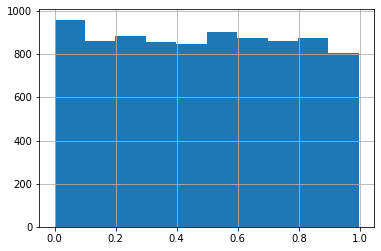

In [11]:
df["pct_rank"] = df["rank"] / df.groupby("id")["cell_id"].transform("count")

df["pct_rank"].hist(bins=10)

In [12]:
from sklearn.model_selection import GroupShuffleSplit

NVALID = 0.1  # size of validation set

splitter = GroupShuffleSplit(n_splits=1, test_size=NVALID, random_state=0)

train_ind, val_ind = next(splitter.split(df, groups=df["ancestor_id"]))

train_df = df.loc[train_ind].reset_index(drop=True)
val_df = df.loc[val_ind].reset_index(drop=True)

In [13]:
val_df.head()

,id,cell_id,cell_type,source,rank,ancestor_id,parent_id,pct_rank
0,051d049a469e47,d7e4aeec,code,!pip install pyspark,1,6aff1937,NaN,0.010989
1,051d049a469e47,aeb2a838,code,from pyspark.sql import SparkSession\nspark = SparkSession.builder.appName('classification').getOrCreate(),3,6aff1937,NaN,0.032967
2,051d049a469e47,12c1a908,code,"from itertools import chain\nfrom pyspark.sql.functions import count, mean, when, lit, create_map, regexp_extract",4,6aff1937,NaN,0.043956
3,051d049a469e47,e7e68995,code,"df1 = spark.read.csv('../input/titanic/train.csv',\\n header=True, inferSchema=True)\ndf2 = spar...",6,6aff1937,NaN,0.065934
4,051d049a469e47,320bedc7,code,df1.printSchema(),8,6aff1937,NaN,0.087912


In [14]:
from bisect import bisect


def count_inversions(a):
    inversions = 0
    sorted_so_far = []
    for i, u in enumerate(a):
        j = bisect(sorted_so_far, u)
        inversions += i - j
        sorted_so_far.insert(j, u)
    return inversions


def kendall_tau(ground_truth, predictions):
    total_inversions = 0
    total_2max = 0  # twice the maximum possible inversions across all instances
    for gt, pred in zip(ground_truth, predictions):
        ranks = [gt.index(x) for x in pred]  # rank predicted order in terms of ground truth
        total_inversions += count_inversions(ranks)
        n = len(gt)
        total_2max += n * (n - 1)
    return 1 - 4 * total_inversions / total_2max

In [15]:
y_dummy = val_df.groupby('id')['cell_id'].apply(list)
kendall_tau(df_orders.loc[y_dummy.index], y_dummy)

0.30079100123311975

In [16]:
val_df["cell_type"].value_counts()

code        512
markdown    390
Name: cell_type, dtype: int64

In [17]:
train_df_mark = train_df[train_df["cell_type"] == "markdown"].reset_index(drop=True)

val_df_mark = val_df[val_df["cell_type"] == "markdown"].reset_index(drop=True)

In [18]:
from sklearn.metrics import mean_squared_error

mean_squared_error(val_df_mark["pct_rank"], np.ones(val_df_mark.shape[0])*train_df_mark["pct_rank"].mean())

0.08525798294600553

In [19]:
from tqdm import tqdm
import sys, os
from transformers import DistilBertModel, DistilBertTokenizer
import torch.nn.functional as F
import torch.nn as nn
import torch

MAX_LEN = 128

# class MarkdownModel(nn.Module):
#     def __init__(self):
#         super(MarkdownModel, self).__init__()
#         self.distill_bert = DistilBertModel.from_pretrained(BERT_PATH)
#         self.top = nn.Linear(768, 1)
        
#     def forward(self, ids, mask):
#         x = self.distill_bert(ids, mask)[0]
#         x = self.top(x[:, 0, :])
#         x = torch.sigmoid(x)
#         return x
    
class MarkdownModel(nn.Module):
    def __init__(self):
        super(MarkdownModel, self).__init__()
        self.distill_bert = DistilBertModel.from_pretrained(BERT_PATH)

        self.top1 = nn.Linear(768, 64)
        self.top2 = nn.Linear(64, 1)

        self.dropout1 = torch.nn.Dropout(p=0.2)
        self.dropout2 = torch.nn.Dropout(p=0.2)
        
    def forward(self, ids, mask):
        x = self.distill_bert(ids, mask)[0][:, 0, :]
        x = self.dropout1(x)
        x0 = self.top1(x)
        x = self.dropout2(x0)
        x = self.top2(x)
        x = torch.sigmoid(x)
        return x

In [20]:
from torch.utils.data import DataLoader, Dataset



class MarkdownDataset(Dataset):
    
    def __init__(self, df, max_len):
        super().__init__()
        self.df = df.reset_index(drop=True)
        self.max_len = max_len
        self.tokenizer = DistilBertTokenizer.from_pretrained(BERT_PATH, do_lower_case=True)

    def __getitem__(self, index):
        row = self.df.iloc[index]
        
        inputs = self.tokenizer.encode_plus(
            row.source,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding="max_length",
            return_token_type_ids=True,
            truncation=True
        )
        ids = torch.LongTensor(inputs['input_ids'])
        mask = torch.LongTensor(inputs['attention_mask'])

        return ids, mask, torch.FloatTensor([row.pct_rank])

    def __len__(self):
        return self.df.shape[0]
    
train_ds = MarkdownDataset(train_df_mark, max_len=MAX_LEN)
val_ds = MarkdownDataset(val_df_mark, max_len=MAX_LEN)

val_ds[0]

(tensor([  101,  3227,  1010,  1996,  3392,  1011,  2241,  7241,  4118, 10438,
          2488,  2084,  1996,  7399,  2944,  1998,  2426,  1996,  3392,  1011,
          2241,  2944,  1010, 17978, 12992,  2075, 10438,  2488,  2084,  6721,
          3224,  1012,  2057,  2089,  3231,  2367,  4118,  2005,  2256,  2345,
         12339,  1012,  1001, 17547,  2085,  2057,  3579,  2006,  2437,  1037,
         17547,  2006,  3231,  2951,  1998, 12040,  1996,  2765,  1012,  2057,
          2342,  2000,  3582,  1996,  6635,  2168,  7709,  2005,  1996,  3231,
          2951,  2005,  2951,  9344,  1012,  2034,  2057,  9718,  1996, 20346,
          1998,  2156,  2065,  2045,  2024,  2151,  4394,  5300,  1999,  1996,
          3231,  2951,  1012,   102,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,  

In [21]:
val_df_mark.iloc[0]

id                                                                                                                      051d049a469e47
cell_id                                                                                                                       ab896c1d
cell_type                                                                                                                     markdown
source         Generally, the tree-based ensemble method performs better than the linear model and among the tree-based model, grad...
rank                                                                                                                                68
ancestor_id                                                                                                                   6aff1937
parent_id                                                                                                                          NaN
pct_rank                                               

In [22]:
def adjust_lr(optimizer, epoch):
    if epoch < 1:
        lr = 5e-5
    elif epoch < 2:
        lr = 4e-5
    elif epoch < 5:
        lr = 3e-5
    else:
        lr = 2e-5

    for p in optimizer.param_groups:
        p['lr'] = lr
    return lr
    
def get_optimizer(net):
    optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, net.parameters()), lr=3e-4, betas=(0.9, 0.999),
                                 eps=1e-08)
    return optimizer

In [23]:
BS = 128
NW = 8

train_loader = DataLoader(train_ds, batch_size=BS, shuffle=True, num_workers=NW,
                          pin_memory=False, drop_last=True)
val_loader = DataLoader(val_ds, batch_size=BS, shuffle=False, num_workers=NW,
                          pin_memory=False, drop_last=False)

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [24]:
def read_data(data):
    return tuple(d.cuda() for d in data[:-1]), data[-1].cuda()


def validate(model, val_loader):
    model.eval()
    
    tbar = tqdm(val_loader, file=sys.stdout)
    
    preds = []
    labels = []

    with torch.no_grad():
        for idx, data in enumerate(tbar):
            inputs, target = read_data(data)

            pred = model(inputs[0], inputs[1])

            preds.append(pred.detach().cpu().numpy().ravel())
            labels.append(target.detach().cpu().numpy().ravel())
    
    return np.concatenate(labels), np.concatenate(preds)

def train(model, train_loader, val_loader, epochs):
    np.random.seed(0)
    
    optimizer = get_optimizer(model)

    criterion = torch.nn.L1Loss()
    
    for e in range(epochs):   
        model.train()
        tbar = tqdm(train_loader, file=sys.stdout)
        
        lr = adjust_lr(optimizer, e)
        
        loss_list = []
        preds = []
        labels = []

        for idx, data in enumerate(tbar):
            inputs, target = read_data(data)

            optimizer.zero_grad()
            pred = model(inputs[0], inputs[1])

            loss = criterion(pred, target)
            loss.backward()
            optimizer.step()
            
            loss_list.append(loss.detach().cpu().item())
            preds.append(pred.detach().cpu().numpy().ravel())
            labels.append(target.detach().cpu().numpy().ravel())
            
            avg_loss = np.round(np.mean(loss_list), 4)

            tbar.set_description(f"Epoch {e+1} Loss: {avg_loss} lr: {lr}")
            
        y_val, y_pred = validate(model, val_loader)
            
        val_df["pred"] = val_df.groupby(["id", "cell_type"])["rank"].rank(pct=True)
        val_df.loc[val_df["cell_type"] == "markdown", "pred"] = y_pred

        y_dummy = val_df.sort_values("pred").groupby('id')['cell_id'].apply(list)
        score = kendall_tau(df_orders.loc[y_dummy.index], y_dummy)

        print('score : ', score)

        output_model_file = f"./my_own_model_file_{e}_{np.round(score, 5)}.bin"
        model_to_save = model.module if hasattr(model, 'module') else model
        torch.save(model_to_save.state_dict(), output_model_file)
                        
        print("Validation MSE:", np.round(mean_squared_error(y_val, y_pred), 4))
        print()
    return model, y_pred

model = MarkdownModel()
model = model.cuda()
model, y_pred = train(model, train_loader, val_loader, epochs=5)
# model.load_state_dict(torch.load('../input/mymodels2022v2/my_own_model_markdown_file_0_0.78085.bin'))



Some weights of the model checkpoint at ../input/huggingface-bert-variants/distilbert-base-uncased/distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


100%|██████████| 4/4 [00:01<00:00,  2.29it/s]
score :  0.5972209690517007
Validation MSE: 0.0872

  0%|          | 0/20 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


100%|██████████| 4/4 [00:01<00:00,  2.27it/s]
score :  0.5894011849980451
Validation MSE: 0.0961

  0%|          | 0/20 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


100%|██████████| 4/4 [00:02<00:00,  1.97it/s]
score :  0.6113567325333094
Validation MSE: 0.085

  0%|          | 0/20 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


100%|██████████| 4/4 [00:01<00:00,  2.16it/s]
score :  0.6090107973172125
Validation MSE: 0.092

  0%|          | 0/20 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


100%|██████████| 4/4 [00:01<00:00,  2.28it/s]
score :  0.6325904538482361
Validation MSE: 0.0855



In [25]:
val_df["pred"] = val_df.groupby(["id", "cell_type"])["rank"].rank(pct=True)
val_df.loc[val_df["cell_type"] == "markdown", "pred"] = y_pred

In [26]:
y_dummy = val_df.sort_values("pred").groupby('id')['cell_id'].apply(list)
kendall_tau(df_orders.loc[y_dummy.index], y_dummy)

0.6325904538482361

In [27]:
paths_test = list((data_dir / 'test').glob('*.json'))
notebooks_test = [
    read_notebook(path) for path in tqdm(paths_test, desc='Test NBs')
]
test_df = (
    pd.concat(notebooks_test)
    .set_index('id', append=True)
    .swaplevel()
    .sort_index(level='id', sort_remaining=False)
).reset_index()

Test NBs: 100%|██████████| 4/4 [00:00<00:00, 114.99it/s]


In [28]:
test_df["rank"] = test_df.groupby(["id", "cell_type"]).cumcount()
test_df["pred"] = test_df.groupby(["id", "cell_type"])["rank"].rank(pct=True)

In [29]:
test_df["pct_rank"] = 0
test_ds = MarkdownDataset(test_df[test_df["cell_type"] == "markdown"].reset_index(drop=True), max_len=MAX_LEN)
test_loader = DataLoader(test_ds, batch_size=BS, shuffle=False, num_workers=NW,
                          pin_memory=False, drop_last=False)

len(test_ds), test_ds[0]

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


(43,
 (tensor([  101,  1001, 25169,  2951,   100,  2292,  1005,  1055,  4094,  1996,
           2951,  2061,  7473,  2050,  2064,  2022,  4162,   102,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     

In [30]:
model = MarkdownModel()
model = model.cuda()
# model.load_state_dict(torch.load('../input/mymodels2022v3/my_own_model_markdown_file_0_0.78169.bin'))
y_test = validate(model, test_loader)[1]

# model = MarkdownModel()
# model = model.cuda()
# model.load_state_dict(torch.load('../input/mymodels2022v3/my_own_model_markdown_file_1_0.74917.bin'))
# y_test += validate(model, test_loader)[1]/3

# model = MarkdownModel()
# model = model.cuda()
# model.load_state_dict(torch.load('../input/mymodels2022v3/my_own_model_markdown_file_2_0.75551.bin'))
# y_test += validate(model, test_loader)[1]/3


Some weights of the model checkpoint at ../input/huggingface-bert-variants/distilbert-base-uncased/distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


100%|██████████| 1/1 [00:00<00:00,  1.56it/s]


In [31]:
test_df.loc[test_df["cell_type"] == "markdown", "pred"] = y_test


In [32]:
sub_df = test_df.sort_values("pred").groupby("id")["cell_id"].apply(lambda x: " ".join(x)).reset_index()
sub_df.rename(columns={"cell_id": "cell_order"}, inplace=True)
sub_df.head()

,id,cell_order
0,0009d135ece78d,ddfd239c c6cd22db 1372ae9b 39e937ec e25aa9bd 8cb8d28a ba55e576 f9893819 0a226b6a 90ed07ab 7f388a41 2843a25a 06dbf8cf
1,0010483c12ba9b,54c7cab3 fe66203e 7844d5f8 5ce8863c 7f270e34 4a0777c4 4703bb6d 4a32c095 865ad516 02a0be6d
2,0010a919d60e4f,aafc3d23 80e077ec b190ebb4 ed415c3c 322850af c069ed33 868c4eae 80433cf3 bd8fbd76 0e2529e8 1345b8b2 cdae286f 4907b9ef...
3,0028856e09c5b7,012c9d02 eb293dfc d22526d1 3ae7ece3


In [33]:
sub_df.to_csv("submission.csv", index=False)